## Linear Regression Model for Predicting Housing Prices

Kaggle dataset consists of roughly 3,000 property listing. Each listing consists of 80 attributes, including the sale price. 

1. Exploratory Data Analysis
2. Data Preprocessing
3. Modelling

I will be following the work of another model.

In [1]:
# Import of libraries for data analysis
import numpy as np
import pandas as pd
from math import sqrt
from scipy.stats import skew
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
plt.style.use(style='fivethirtyeight')
plt.rcParams['figure.figsize'] = (10,6)

## Exploratory Data Analysis

In [3]:
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

In [4]:
# Glance at the train set
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.shape

(1460, 81)

In [6]:
# Glance at the test set
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
test.shape

(1459, 80)

Difference in size, specifically the columns, of the test and train datasets is from the omission of the SalePrice Column from the test data set

In [8]:
# check for missing values
print('Total missing values in train set: ', sum(train.isna().sum()))
print('total missing values in test set: ', sum(test.isna().sum()))

Total missing values in train set:  6965
total missing values in test set:  7000


## Sale Price Description

In [9]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [10]:
import seaborn as sb
from scipy.stats import norm, skew, spearmanr

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

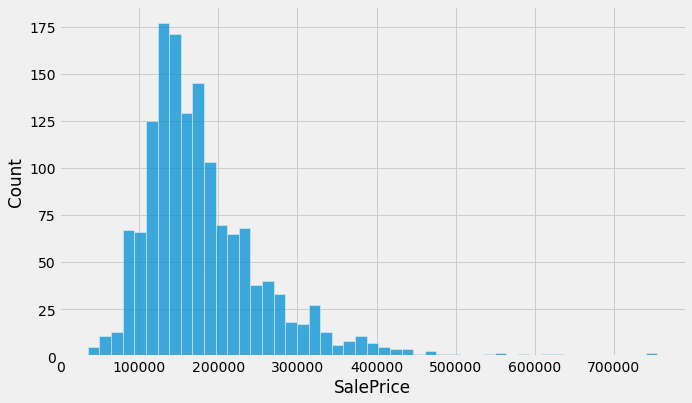

In [11]:
sb.histplot(train['SalePrice'])

In [12]:
print('Skewness of train data: ', train['SalePrice'].skew())

Skewness of train data:  1.8828757597682129


/Users/jasonwerenski/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

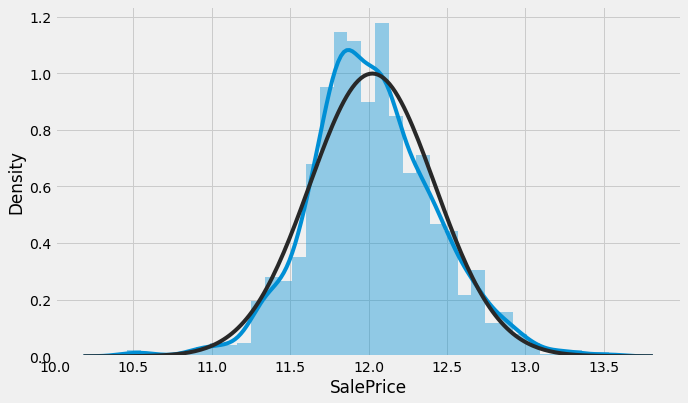

In [13]:
sb.distplot(np.log1p(train['SalePrice']), fit=norm)

## Correlation Matrix


In [14]:
train.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


[Text(0.5, 0, 'Id'),
 Text(1.5, 0, 'MSSubClass'),
 Text(2.5, 0, 'LotFrontage'),
 Text(3.5, 0, 'LotArea'),
 Text(4.5, 0, 'OverallQual'),
 Text(5.5, 0, 'OverallCond'),
 Text(6.5, 0, 'YearBuilt'),
 Text(7.5, 0, 'YearRemodAdd'),
 Text(8.5, 0, 'MasVnrArea'),
 Text(9.5, 0, 'BsmtFinSF1'),
 Text(10.5, 0, 'BsmtFinSF2'),
 Text(11.5, 0, 'BsmtUnfSF'),
 Text(12.5, 0, 'TotalBsmtSF'),
 Text(13.5, 0, '1stFlrSF'),
 Text(14.5, 0, '2ndFlrSF'),
 Text(15.5, 0, 'LowQualFinSF'),
 Text(16.5, 0, 'GrLivArea'),
 Text(17.5, 0, 'BsmtFullBath'),
 Text(18.5, 0, 'BsmtHalfBath'),
 Text(19.5, 0, 'FullBath'),
 Text(20.5, 0, 'HalfBath'),
 Text(21.5, 0, 'BedroomAbvGr'),
 Text(22.5, 0, 'KitchenAbvGr'),
 Text(23.5, 0, 'TotRmsAbvGrd'),
 Text(24.5, 0, 'Fireplaces'),
 Text(25.5, 0, 'GarageYrBlt'),
 Text(26.5, 0, 'GarageCars'),
 Text(27.5, 0, 'GarageArea'),
 Text(28.5, 0, 'WoodDeckSF'),
 Text(29.5, 0, 'OpenPorchSF'),
 Text(30.5, 0, 'EnclosedPorch'),
 Text(31.5, 0, '3SsnPorch'),
 Text(32.5, 0, 'ScreenPorch'),
 Text(33.5, 0, 'Poo

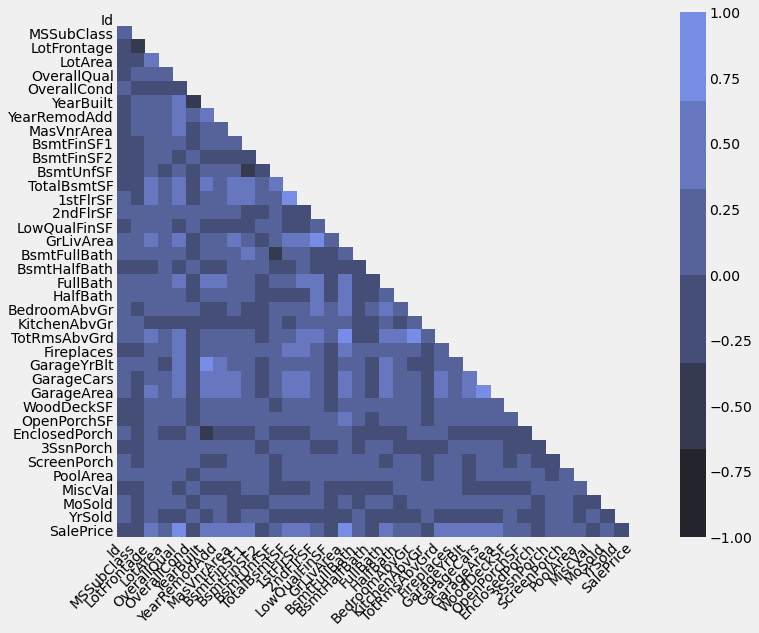

In [15]:
f, ax = plt.subplots(figsize=(12,9))
mask = np.triu(np.ones_like(train.corr()))
map = sb.heatmap(train.corr(), vmin = -1, vmax = 1, center = 0,
                mask=mask, cmap=sb.dark_palette((260,75,60), input='husl'),
                 square=True, xticklabels=True, yticklabels=True)
map.set_xticklabels(map.get_xticklabels(), rotation=45, horizontalalignment='right')



In [16]:
corr = train.corr()
corr['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [23]:
highest_correlations = corr.index[abs(corr['SalePrice'])>0.5]
train[highest_correlations].corr()['SalePrice']

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64

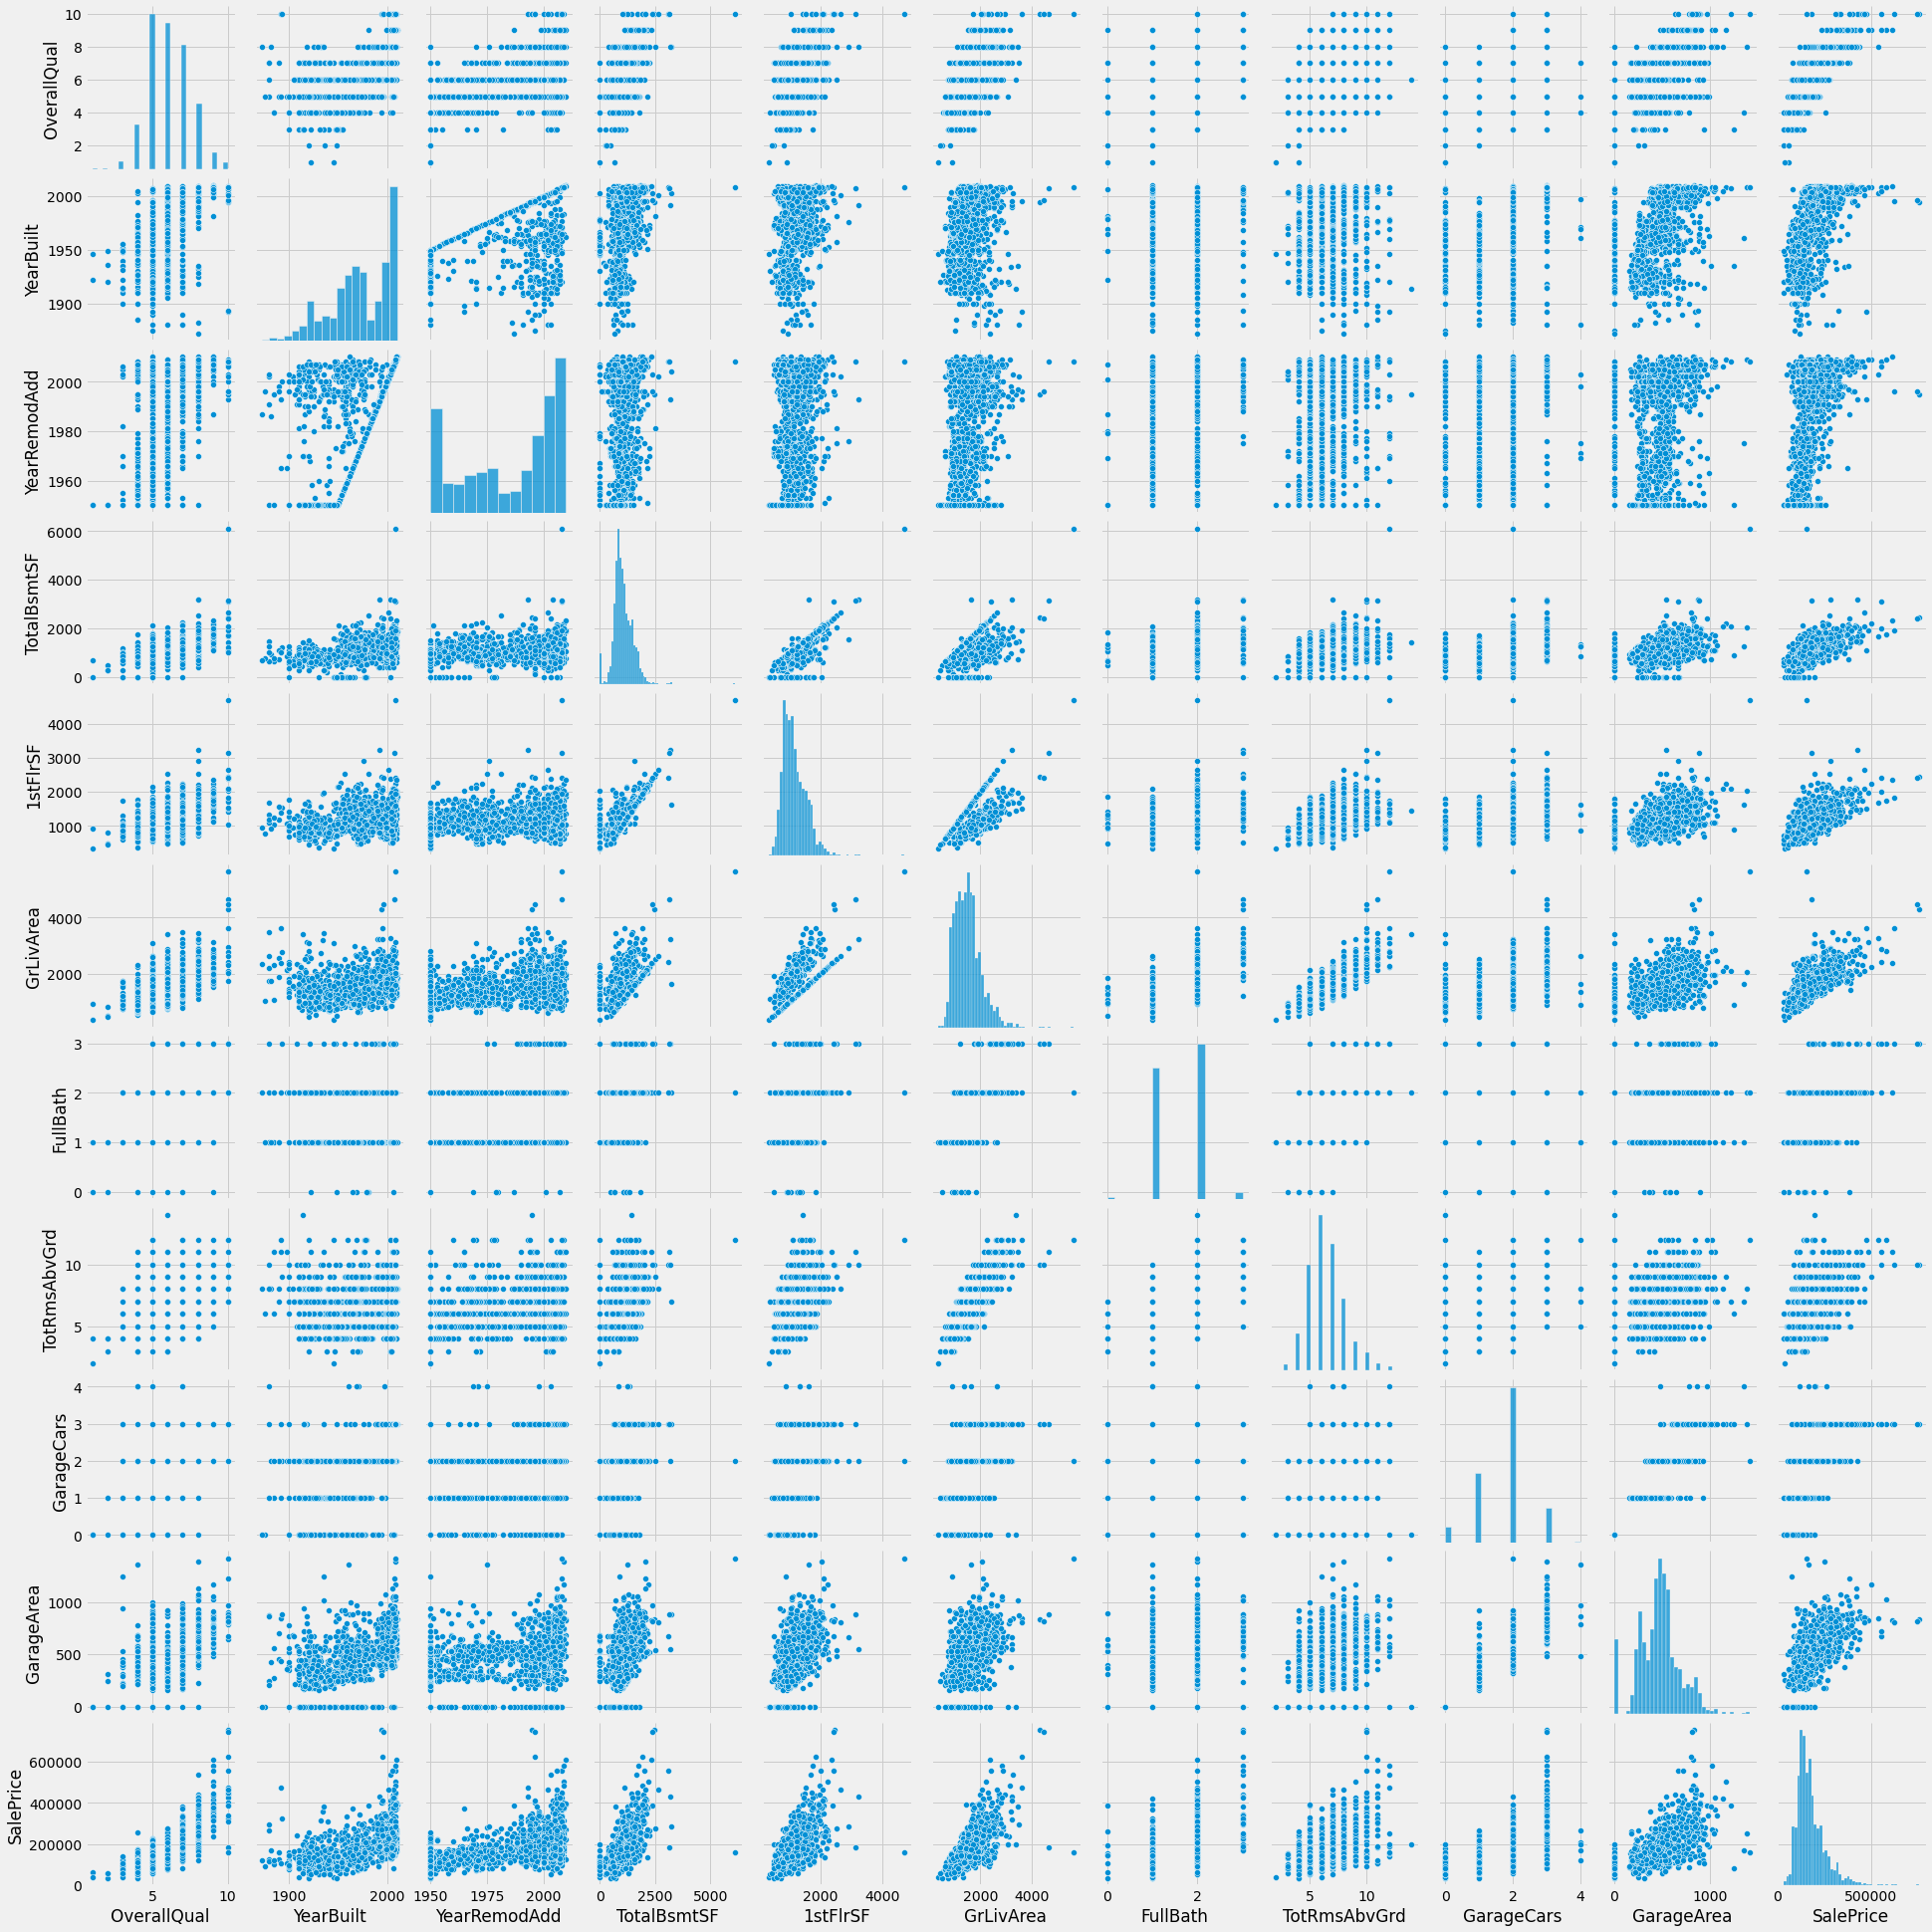

In [26]:
sb.pairplot(train[highest_correlations])

## Data Preprocessing

data is prepared to make it suitable for building and training machine learning model. Outliers are removed.

In [29]:
# remove GrLivArea and GarageArea outliers

train = train[train['GrLivArea'] < 4500]
train = train[train['GarageArea'] < 1200]


In [30]:
# drop columns with percentage of missing values > 80%

train_percentage = train.isnull().sum()/train.shape[0]
print(train_percentage[train_percentage > 0.80])
train = train.drop(train_percentage[train_percentage > 0.8].index, axis=1)

Alley          0.937414
PoolQC         0.995873
Fence          0.806740
MiscFeature    0.963549
dtype: float64


In [31]:
# drop test columns 

test_percentage = test.isnull().sum()/test.shape[0]
print(test_percentage[test_percentage > 0.80])
test = test.drop(test_percentage[test_percentage > 0.80].index, axis=1)

Alley          0.926662
PoolQC         0.997944
Fence          0.801234
MiscFeature    0.965045
dtype: float64


In [52]:
# encode categorical variables
le = preprocessing.LabelEncoder()
for name in train.columns:
    if train[name].dtypes == 'O':
        train[name] = train[name].astype(str)
        le.fit(train[name])
        train[name] = le.transform(train[name])

for name in test.columns:
    if test[name].dtypes == 'O':
        test[name] = test[name].astype(str)
        le.fit(test[name])
        test[name] = le.transform(test[name])

In [53]:
# fill in missing values based on probability of occurence

for column in train.columns:
    null_vals = train.isnull().values
    a,b = np.unique(train.values[~null_vals], return_counts = 1)
    train.loc[train[column].isna(), column] = np.random.choice(a, train[column].isnull().sum(), p = b/b.sum())
    

In [54]:
for column in test.columns:
    null_vals = test.isnull().values
    a,b = np.unique(test.values[~null_vals], return_counts = 1)
    test.loc[test[column].isna(), column] = np.random.choice(a, test[column].isnull().sum(), p = b/b.sum())

In [55]:
# apply log transformation to reduce skewness over 0.75

skewed_train = train.apply(lambda x: skew(x.dropna()))
skewed_train = skewed_train[skewed_train > 0.75]
train[skewed_train.index] = np.log1p(train[skewed_train.index])

skewed_test = test.apply(lambda x: skew(x.dropna()))
skewed_test = skewed_test[skewed_test > 0.75]
test[skewed_test.index] = np.log1p(test[skewed_test.index])

## Modelling

Simple linear regression on the dataset to predict housing prices

In [56]:
X = train.drop(['SalePrice', 'Id'], axis = 1)
y = train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [57]:
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

In [58]:
predictions = model.predict(X_test)

In [59]:
print('MAE is: ', mean_absolute_error(y_test, predictions))
print('MSE is: ', mean_squared_error(y_test,predictions))
print('RMSE is: ', sqrt(mean_squared_error(y_test,predictions)))

MAE is:  0.09078729875237676
MSE is:  0.018278197997007903
RMSE is:  0.13519688604774854


Text(0.5, 1.0, 'Linear Regression Model')

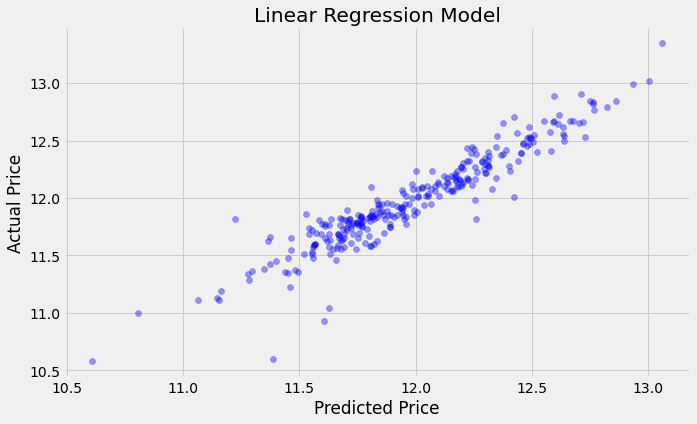

In [61]:
plt.scatter(predictions, y_test, alpha = 0.4, color = 'b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')